In [2]:
#Import required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
#Function to import dataset
def import_data():
    wine_data = pd.read_csv('winequality-red.csv', sep=';', header=0)
    print('Dataset Length:', len(wine_data))
    print('Dataset Shape:', wine_data.shape)
    print('Dataset:', wine_data.head())

    return wine_data

In [4]:
# Function to split the dataset into features and target variables
def split_dataset(wine_data):
    #Separate target variable
    x = wine_data.values[:, :-1]
    y = wine_data.values[:, -1]

    # Split the dataset into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

    return x, y, x_train, x_test, y_train, y_test

In [5]:
def train_decision_tree(x_train, y_train, criterion='gini'):
    return DecisionTreeClassifier(
        criterion=criterion,
        random_state=100,
        min_samples_leaf=5,
        class_weight='balanced'
    ).fit(x_train, y_train)

In [6]:
#Function to make predictions
def prediction(x_test, clf_object):
    y_pred = clf_object.predict(x_test)
    print('Predicted values:')
    print(y_pred)
    
    return y_pred

#Placeholder function for calculate_accuracy
def calculate_accuracy(y_test, y_pred):
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
    print('Report:', classification_report(y_test, y_pred))

In [7]:
#Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(20, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

Dataset Length: 1599
Dataset Shape: (1599, 12)
Dataset:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9

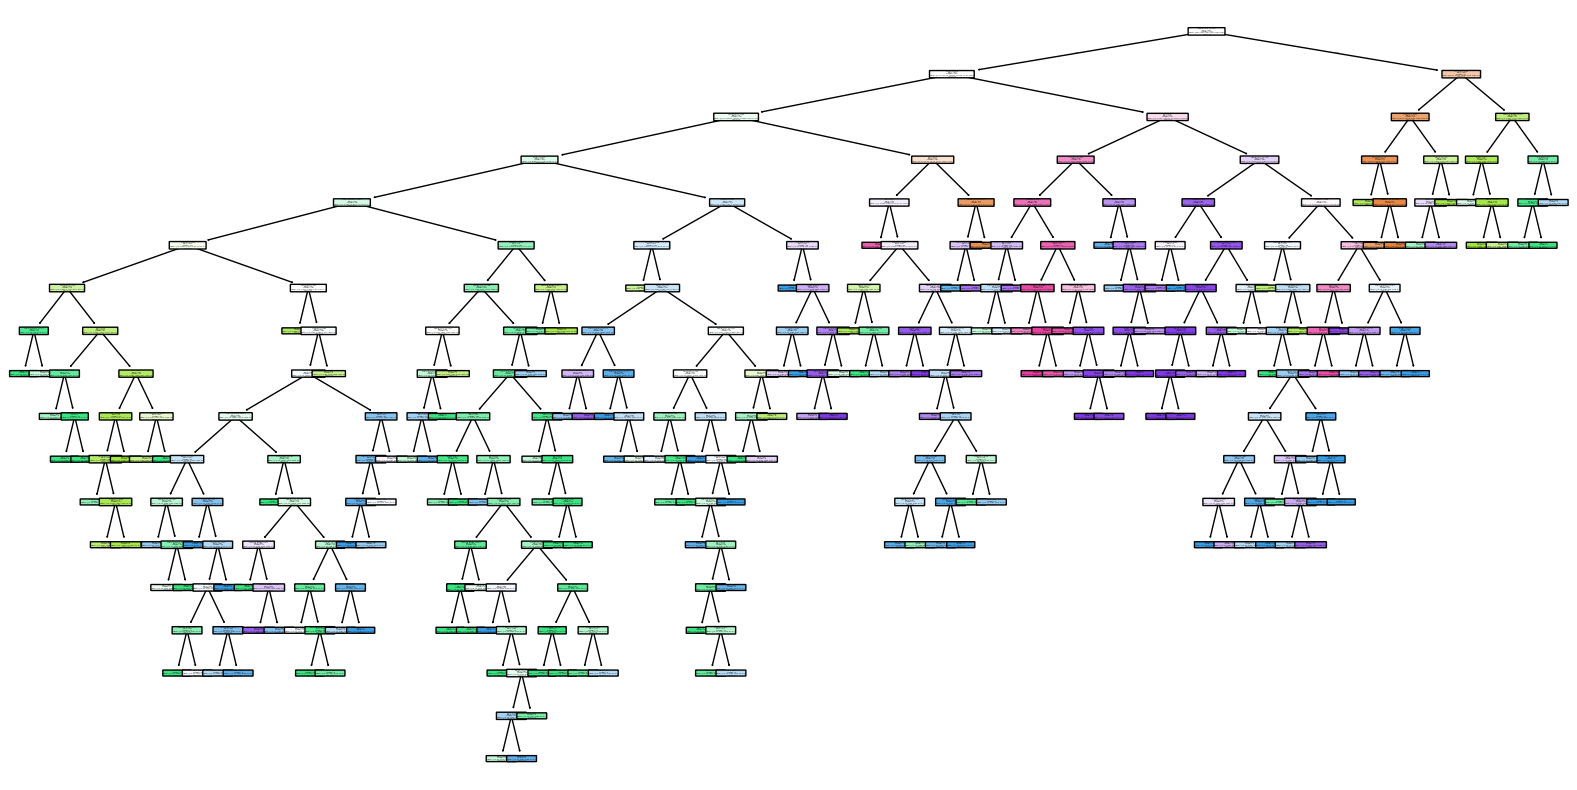

Results using gini index
Predicted values:
[7. 7. 5. 5. 7. 7. 5. 7. 8. 7. 7. 5. 6. 5. 6. 5. 4. 4. 6. 6. 4. 5. 6. 7.
 7. 6. 5. 5. 5. 5. 5. 5. 7. 6. 5. 7. 6. 5. 5. 5. 5. 7. 7. 6. 6. 6. 6. 6.
 5. 7. 4. 5. 6. 6. 7. 6. 7. 6. 5. 5. 7. 6. 7. 7. 5. 5. 6. 6. 5. 5. 5. 7.
 8. 7. 5. 5. 5. 6. 6. 6. 5. 4. 7. 6. 7. 5. 6. 6. 5. 7. 8. 6. 6. 5. 8. 5.
 5. 6. 4. 4. 7. 7. 6. 5. 5. 7. 6. 7. 4. 5. 6. 5. 7. 5. 7. 5. 5. 6. 5. 5.
 7. 4. 7. 7. 7. 4. 6. 5. 4. 5. 6. 6. 5. 7. 8. 6. 7. 7. 5. 5. 6. 5. 6. 5.
 7. 5. 4. 5. 7. 5. 5. 6. 6. 6. 7. 7. 6. 6. 5. 7. 4. 6. 5. 5. 6. 6. 6. 5.
 4. 6. 5. 6. 7. 6. 5. 5. 5. 7. 6. 7. 5. 5. 5. 6. 7. 5. 6. 5. 7. 5. 7. 5.
 5. 6. 4. 5. 5. 4. 6. 4. 8. 7. 7. 3. 5. 6. 6. 4. 6. 8. 5. 7. 6. 5. 3. 6.
 5. 7. 6. 4. 5. 6. 5. 5. 7. 5. 5. 7. 6. 4. 5. 5. 6. 6. 6. 6. 7. 5. 6. 3.
 6. 5. 6. 5. 6. 7. 6. 4. 5. 7. 8. 7. 7. 5. 5. 5. 5. 6. 4. 5. 5. 5. 5. 6.
 5. 5. 5. 4. 7. 6. 5. 7. 7. 5. 6. 5. 7. 6. 5. 6. 3. 7. 5. 7. 3. 5. 8. 6.
 6. 5. 4. 7. 6. 7. 7. 5. 4. 5. 7. 6. 5. 5. 7. 4. 5. 7. 6. 7. 4. 6. 6. 5.
 5. 5. 7

In [8]:
if __name__ == "__main__":
    data = import_data()
    x, y, x_train, x_test, y_train, y_test = split_dataset(data)
    clf_gini = train_decision_tree(x_train, y_train)
    print(x_train.shape)  # This should print (num_samples, num_features)
    feature_names = list(data.columns[:-1]) #Dynamically extract feature names
    class_names = list(map(str, np.unique(y_train))) #Dynamically extract feature names
    
    #Visualize the decision tree
    plot_decision_tree(clf_gini, feature_names, class_names)
   
    # Operational phase
    print('Results using gini index')
    y_pred_gini = prediction(x_test, clf_gini)
    calculate_accuracy(y_test, y_pred_gini)